# 2-G7 Model Building

## i. Set-Up Workspace

In [1]:
# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
import matplotlib.patches as mpatches

# Set up appearance parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
csfont = {'fontname':'Times New Roman'}
%matplotlib inline
sns.set_style('whitegrid')
blue = '#B2D8EB'
red = '#BB734C'

# Import statistics libraries 
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

# Hide extra warnings
import warnings
warnings.filterwarnings(action='once')

# Read in model data
df_model = pd.read_csv('G7 Model Data.csv')

## ii. Bivariate Analysis

In [2]:
# Read in cleaned data
df = pd.read_csv('Cleaned G7 Data.csv')

# Compute mean compliances
df_avg = df.groupby(['Country', 'Year']).mean()
df_issue_avg = df.groupby(['Issue-Area', 'Year']).mean()
df_country_issue_avg = df.groupby(['Country', 'Issue-Area']).mean()
df_all_avg = df.groupby(['Country', 'Year', 'Issue-Area']).mean()

#### a) Number of Same-Issue Commitments

Text(0.5, 1.0, 'Effect of Number of Same-Issue Commitments on G7 Compliance (N = 272)')

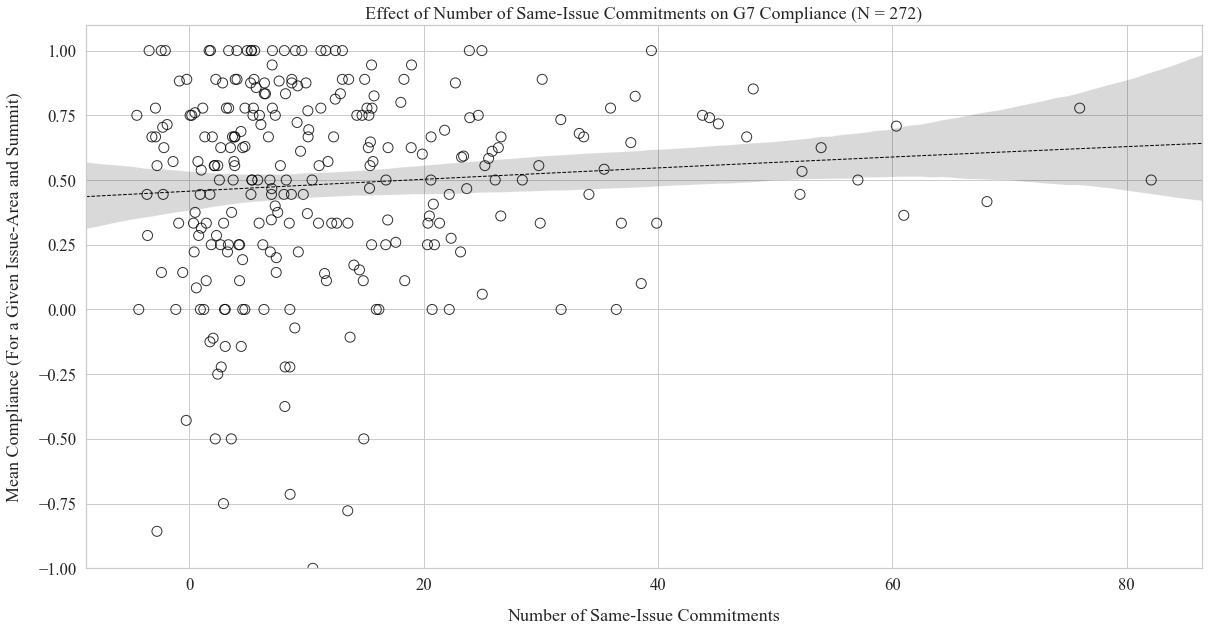

In [3]:
# Make polynomial regression plot
variable = 'Number of Same-Issue Commitments'
data = df_issue_avg[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=2, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Issue-Area and Summit)', labelpad=15)
plt.title('Effect of ' + variable + ' on G7 Compliance (N = 272)')
#plt.savefig('Title.png', bbox_inches='tight')

#### b) GDP per Capita

Text(0.5, 1.0, 'Effect of GDP per Capita on G7 Compliance (N = 299)')

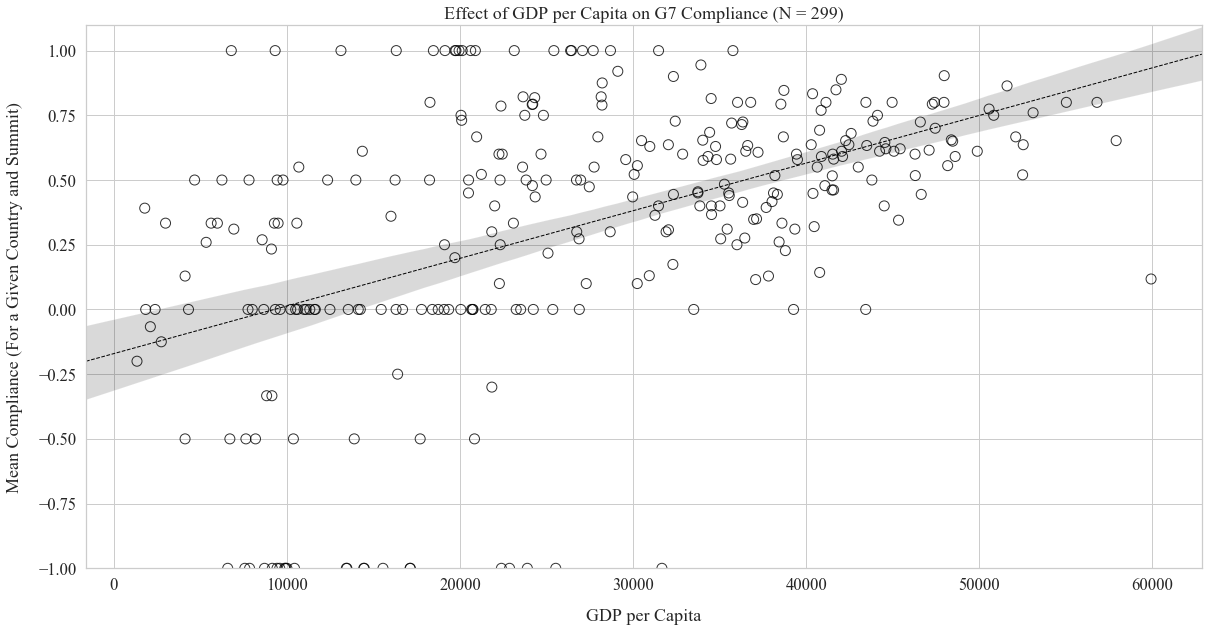

In [4]:
# Make polynomial regression plot
variable = 'GDP per Capita'
data = df_avg[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=1, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Country and Summit)', labelpad=15)
plt.title('Effect of ' + variable + ' on G7 Compliance (N = 299)')
#plt.savefig('Title.png', bbox_inches='tight')

#### c) GDP per Capita Growth

Text(0.5, 1.0, 'Effect of GDP per Capita Growth on G7 Compliance (N = 299)')

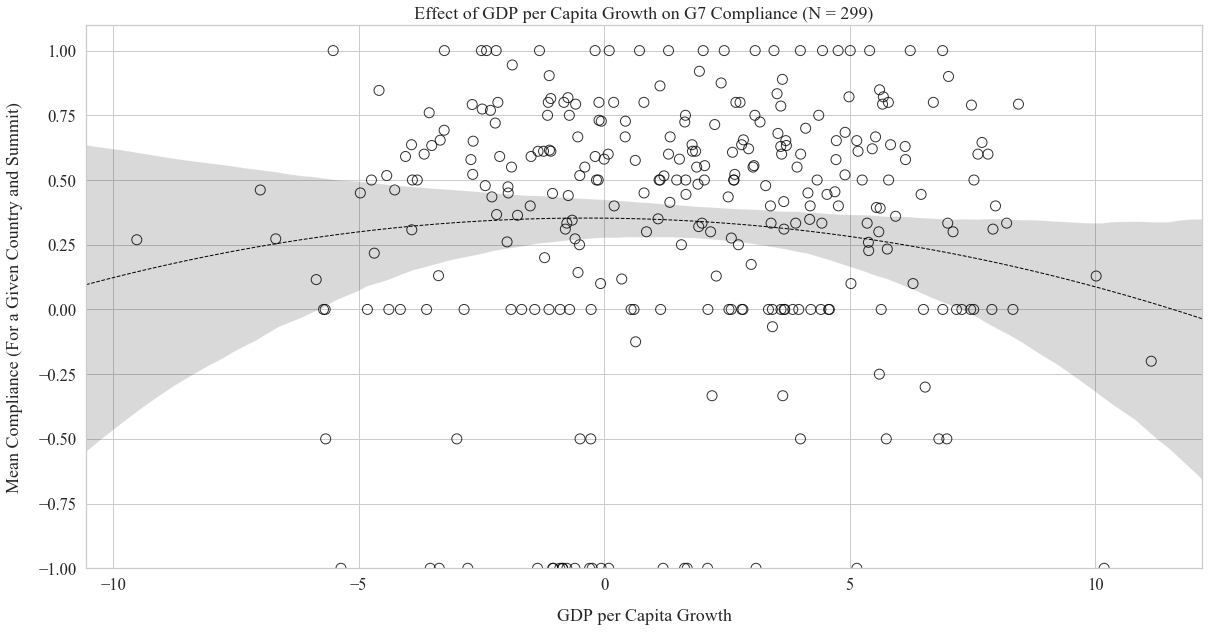

In [5]:
# Make polynomial regression plot
variable = 'GDP per Capita Growth'
data = df_avg[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=2, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Country and Summit)', labelpad=15)
plt.title('Effect of ' + variable + ' on G7 Compliance (N = 299)')
#plt.savefig('Title.png', bbox_inches='tight')

#### d) Closest Ministerial

Text(0.5, 1.0, 'Effect of Number of Closest Ministerial on G7 Compliance (N = 272)')

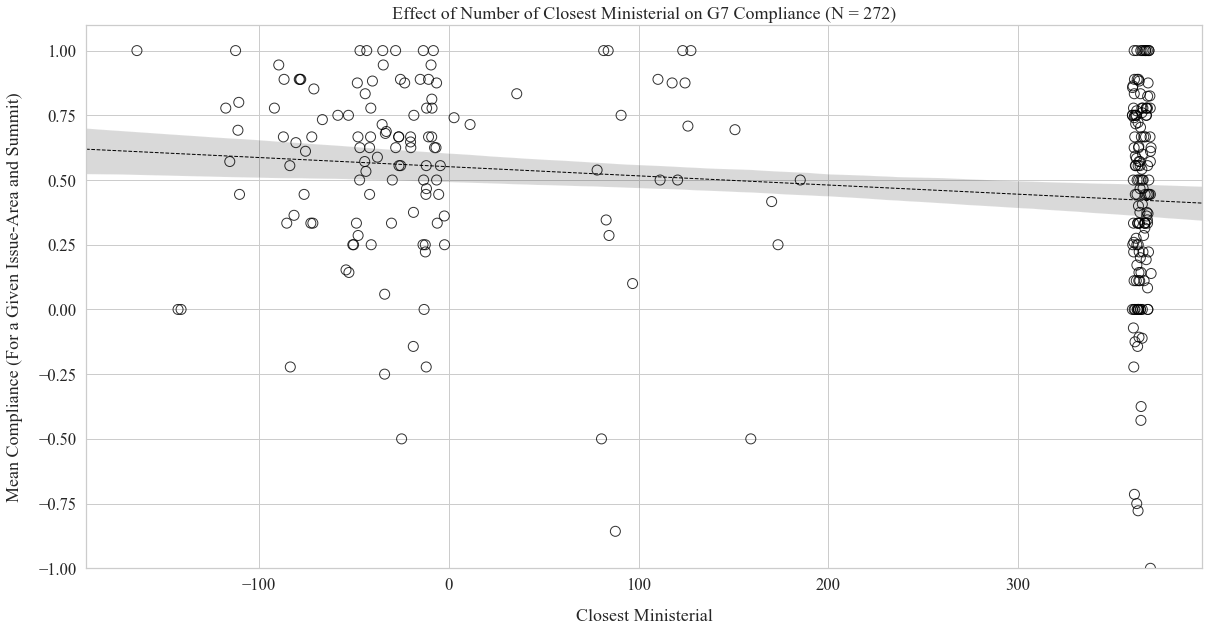

In [6]:
# Make polynomial regression plot
variable = 'Closest Ministerial'
data = df_issue_avg[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=1, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Issue-Area and Summit)', labelpad=15)
plt.title('Effect of Number of ' + variable + ' on G7 Compliance (N = 272)')
#plt.savefig('Title.png', bbox_inches='tight')

#### e) Year

Text(0.5, 1.0, 'Effect of Year on G7 Compliance (N = 299)')

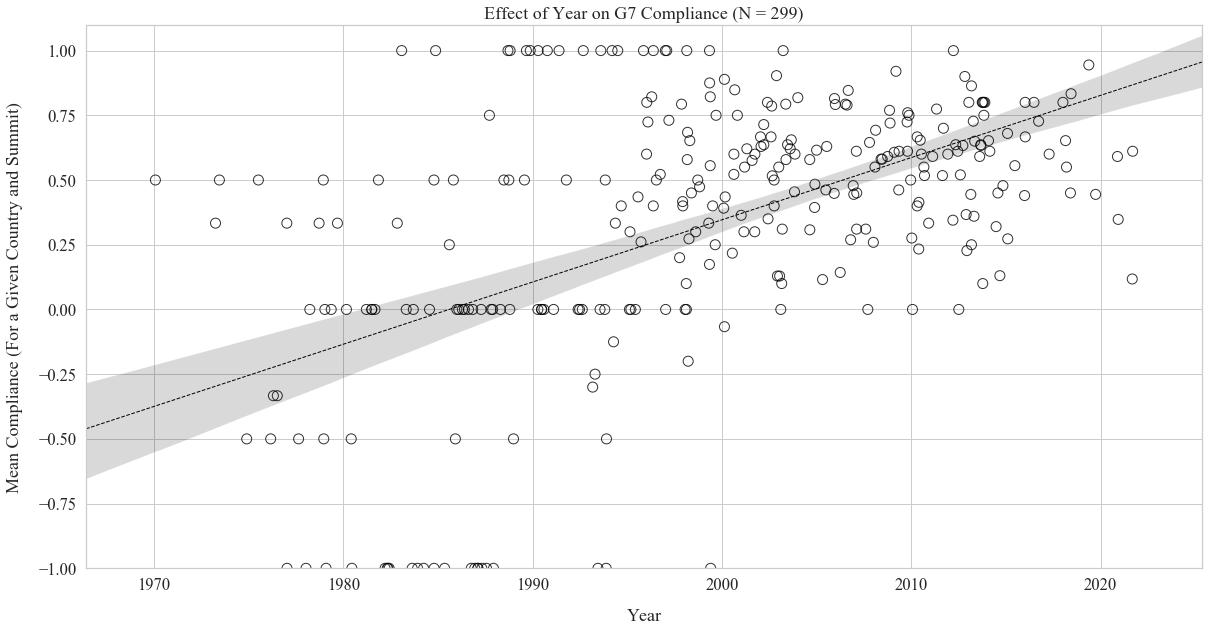

In [7]:
# Make polynomial regression plot
variable = 'Year'
data = df_avg.reset_index()[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=1, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Country and Summit)', labelpad=15)
plt.title('Effect of ' + variable + ' on G7 Compliance (N = 299)')
#plt.savefig('Title.png', bbox_inches='tight')

#### f) GDP

Text(0.5, 1.0, 'Effect of GDP on G7 Compliance (N = 299)')

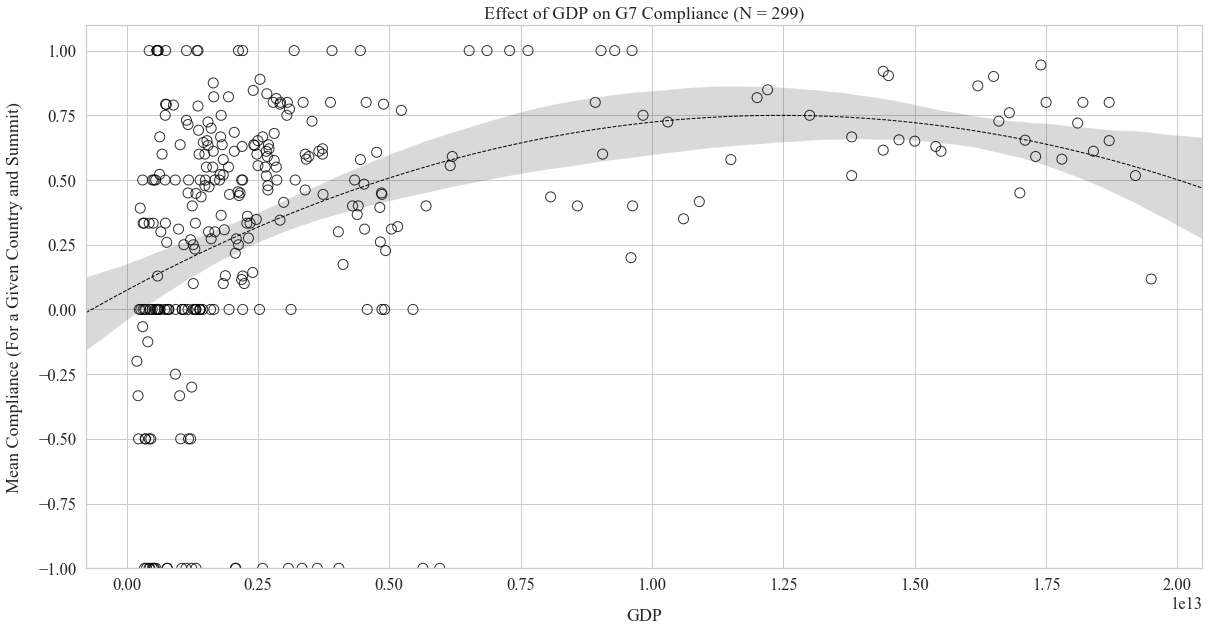

In [8]:
# Make polynomial regression plot
variable = 'GDP'
data = df_avg[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=2, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Country and Summit)', labelpad=15)
plt.title('Effect of ' + variable + ' on G7 Compliance (N = 299)')
#plt.savefig('Title.png', bbox_inches='tight')

#### g) Total Number of Commitments

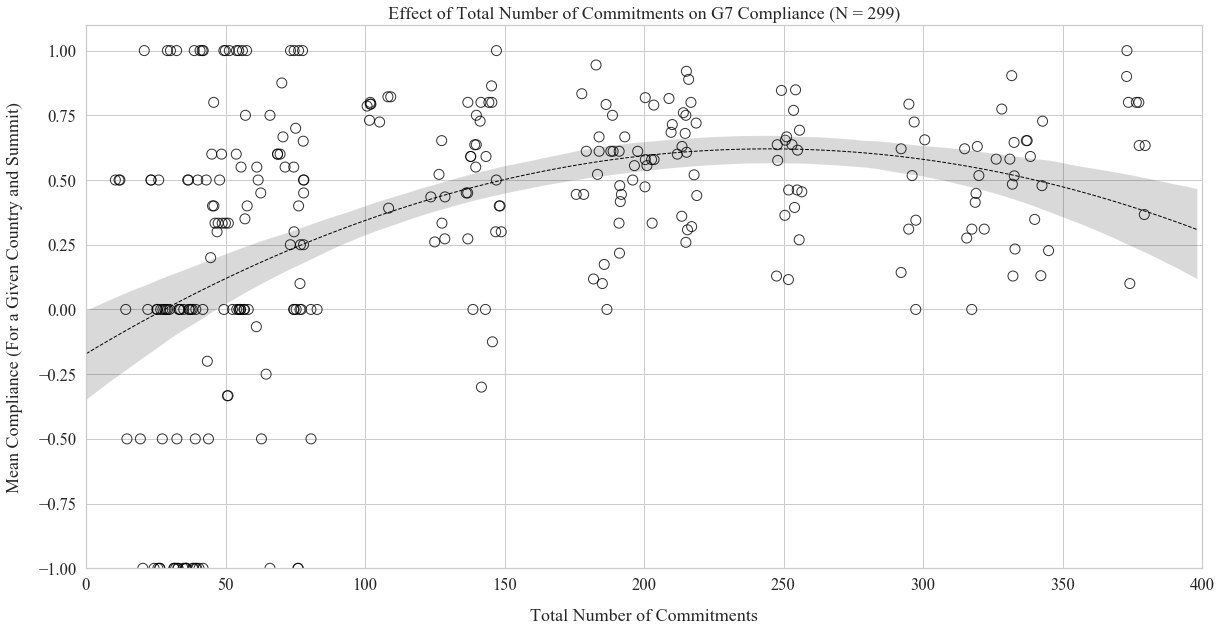

In [26]:
# Make polynomial regression plot
variable = 'Total Number of Commitments'
data = df_avg[['Compliance Score', variable]]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, style='whitegrid', font='Times New Roman')
sns.regplot(x=variable, y='Compliance Score', order=2, data=data, 
            x_jitter=5, scatter_kws={'s': 100, 'color': 'black', 'facecolors':'none'},
            line_kws={'linewidth': 1, 'color': 'black', 'linestyle': '--'})
plt.ylim(-1, 1.1)
plt.xlim(0,400)
plt.xlabel(variable, labelpad=15)
plt.ylabel('Mean Compliance (For a Given Country and Summit)', labelpad=15)
plt.title('Effect of ' + variable + ' on G7 Compliance (N = 299)')
#plt.savefig('Title.png', bbox_inches='tight')
#data.to_csv('Effect of Total Number of Commitments.csv', index=False)

#### h) Binding Level

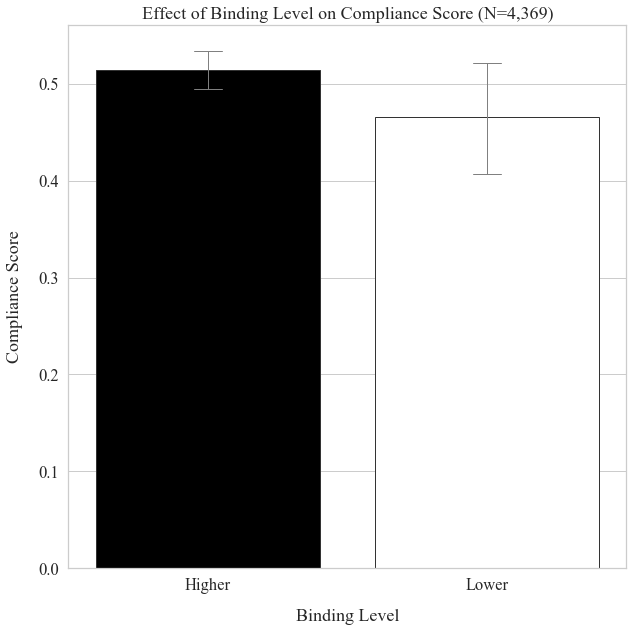

In [10]:
# Make bar plot
variable = 'Binding Level'
data = df[['Compliance Score', variable]]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel(variable, labelpad=15)
plt.ylabel('Compliance Score', labelpad=15)
plt.title('Effect of ' + variable + ' on Compliance Score (N=4,369)')

plot = sns.barplot(x=variable, y='Compliance Score', data=data, palette=['black', 'white'],
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

#### i) Mentions Specific Date

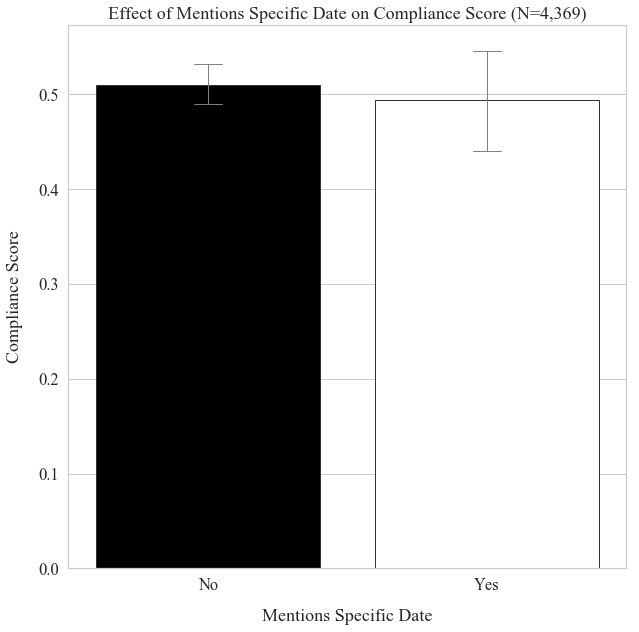

In [11]:
# Make bar plot
variable = 'Mentions Specific Date'
data = df[['Compliance Score', variable]]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel(variable, labelpad=15)
plt.ylabel('Compliance Score', labelpad=15)
plt.title('Effect of ' + variable + ' on Compliance Score (N=4,369)')

plot = sns.barplot(x=variable, y='Compliance Score', data=data, palette=['black', 'white'],
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

#### j) Mentions UN

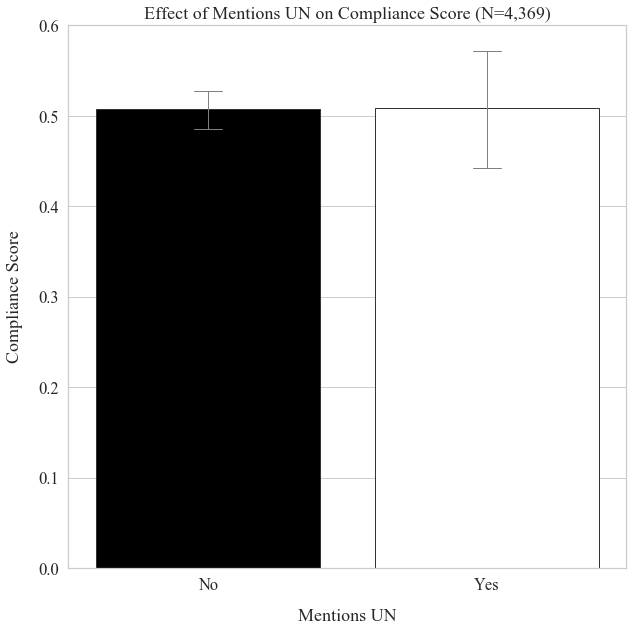

In [12]:
# Make bar plot
variable = 'Mentions UN'
data = df[['Compliance Score', variable]]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel(variable, labelpad=15)
plt.ylabel('Compliance Score', labelpad=15)
plt.title('Effect of ' + variable + ' on Compliance Score (N=4,369)')

plot = sns.barplot(x=variable, y='Compliance Score', data=data, palette=['black', 'white'],
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

#### k) Mentions Developing Countries

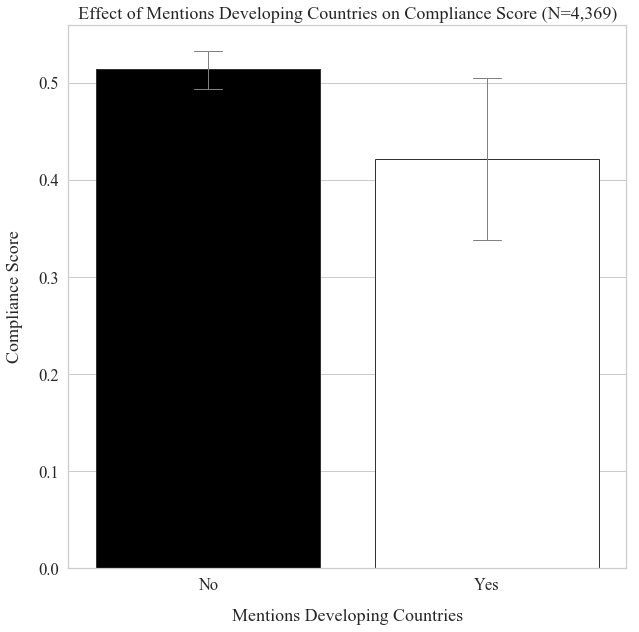

In [13]:
# Make bar plot
variable = 'Mentions Developing Countries'
data = df[['Compliance Score', variable]]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel(variable, labelpad=15)
plt.ylabel('Compliance Score', labelpad=15)
plt.title('Effect of ' + variable + ' on Compliance Score (N=4,369)')

plot = sns.barplot(x=variable, y='Compliance Score', data=data, palette=['black', 'white'],
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

#### l) Is Italy

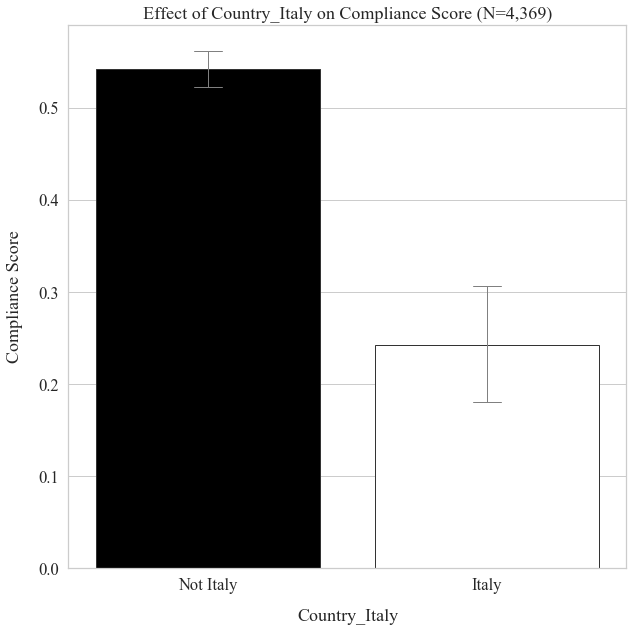

In [14]:
# Make bar plot
variable = 'Country_Italy'
data = df.join(pd.get_dummies(df['Country'], prefix='Country')).drop('Country', axis=1)
data['Country_Italy'] = data['Country_Italy'].replace({1: 'Italy', 0: 'Not Italy'})
data = data[['Compliance Score', variable]]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel(variable, labelpad=15)
plt.ylabel('Compliance Score', labelpad=15)
plt.title('Effect of ' + variable + ' on Compliance Score (N=4,369)')

plot = sns.barplot(x=variable, y='Compliance Score', data=data, palette=['black', 'white'],
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

#### m) Is About Trade

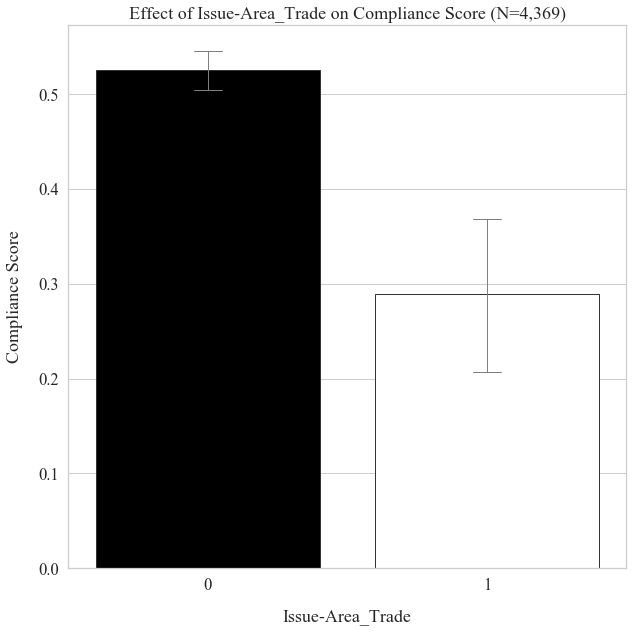

In [15]:
# Make bar plot
variable = 'Issue-Area_Trade'
data = df.join(pd.get_dummies(df['Issue-Area'], prefix='Issue-Area')).drop('Issue-Area', axis=1)
data['Country_Italy'] = data['Issue-Area_Trade'].replace({1: 'Trade', 0: 'Not Trade'})
data = data[['Compliance Score', variable]]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel(variable, labelpad=15)
plt.ylabel('Compliance Score', labelpad=15)
plt.title('Effect of ' + variable + ' on Compliance Score (N=4,369)')

plot = sns.barplot(x=variable, y='Compliance Score', data=data, palette=['black', 'white'],
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

## iii. Build Regression Model

#### a) Standardized

In [16]:
# Isolate variables of interest and give analysis-friendly names
columns = ['Number of Same-Issue Commitments', 'GDP per Capita', 'GDP per Capita Growth',
           'Closest Ministerial', 'Year', 'GDP', 'Total Number of Commitments', 'Binding Level',
           'Mentions Specific Date', 'Mentions UN', 'Mentions Developing Countries',
           'Country_Italy', 'Issue-Area_Trade', 'Compliance Score']
renamed = ['num_same_issue_commitments', 'gdp_pcap', 'gdp_pcap_growth', 'closest_min',
           'year', 'gdp', 'num_commitments', 'binding_level', 'mentions_date', 'mentions_un',
           'mentions_developing', 'is_italy', 'is_trade_commitment', 'compliance_score']
data = df_model[columns]
data.columns = renamed

# Turn GDP into billions
data['gdp'] = data['gdp'] / 1000000000

# Standardize variables
dummies = data[['binding_level', 'mentions_developing', 'mentions_date', 'is_italy',
                'is_trade_commitment']]
data = data.select_dtypes(include=[np.number]).apply(stats.zscore)
data = data.drop(dummies, axis=1).join(dummies)

 # Preprare model
dependent = 'compliance_score'
independent = list(data.drop('compliance_score', axis=1).columns)
coefficients = ' + '.join([str(elem) for elem in independent])
formula = dependent + ' ~ ' + coefficients

# Print results
results = smf.ols(formula, data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       compliance_score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           3.91e-59
Time:                        20:20:17   Log-Likelihood:                -6042.4
No. Observations:                4369   AIC:                         1.211e+04
Df Residuals:                    4355   BIC:                         1.220e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### b) Unstandardized

In [17]:
# Isolate variables of interest and give analysis-friendly names
columns = ['Number of Same-Issue Commitments', 'GDP per Capita', 'GDP per Capita Growth',
           'Closest Ministerial', 'Year', 'GDP', 'Total Number of Commitments', 'Binding Level',
           'Mentions Specific Date', 'Mentions UN', 'Mentions Developing Countries',
           'Country_Italy', 'Issue-Area_Trade', 'Compliance Score']
renamed = ['num_same_issue_commitments', 'gdp_pcap', 'gdp_pcap_growth', 'closest_min',
           'year', 'gdp', 'num_commitments', 'binding_level', 'mentions_date', 'mentions_un',
           'mentions_developing', 'is_italy', 'is_trade_commitment', 'compliance_score']
data = df_model[columns]
data.columns = renamed

# Turn GDP into billions
data['gdp'] = data['gdp'] / 1000000000

 # Preprare model
dependent = 'compliance_score'
independent = list(data.drop('compliance_score', axis=1).columns)
coefficients = ' + '.join([str(elem) for elem in independent])
formula = dependent + ' ~ ' + coefficients

# Print results
results = smf.ols(formula, data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       compliance_score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           3.91e-59
Time:                        20:20:18   Log-Likelihood:                -4246.3
No. Observations:                4369   AIC:                             8521.
Df Residuals:                    4355   BIC:                             8610.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


## iv. Additional Analysis

In [18]:
df['Ministerial Time'] = ''
df['Ministerial Time'] = np.where(df['Closest Ministerial'] < 0, 'Before', df['Ministerial Time'])
df['Ministerial Time'] = np.where(df['Closest Ministerial'] == 0, 'During', df['Ministerial Time'])
df['Ministerial Time'] = np.where(df['Closest Ministerial'] > 0, 'After', df['Ministerial Time'])
df['Ministerial Time'] = np.where(df['Closest Ministerial'] == 365, 'None', df['Ministerial Time'])

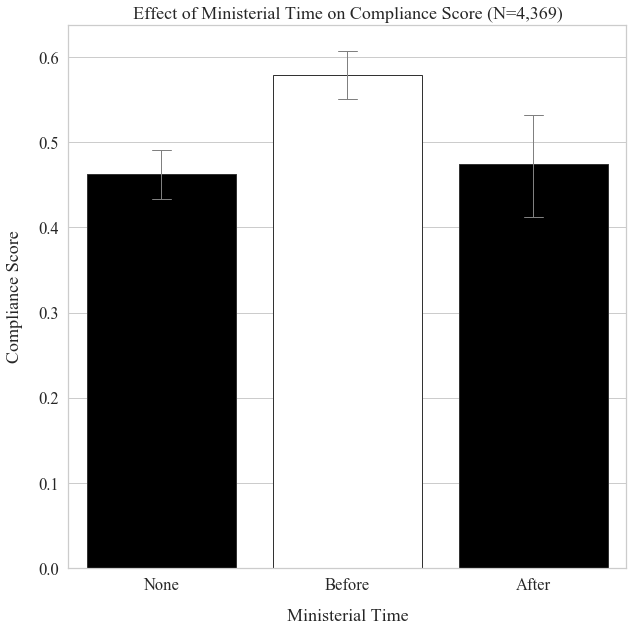

In [25]:
# Bar plot of 'Compliance Score' by 'Ministerial Category'
data = df[['Compliance Score', 'Ministerial Time']]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel('Ministerial Time', labelpad=15, **csfont)
plt.ylabel('Compliance Score', labelpad=15, **csfont)
plt.title('Effect of Ministerial Time on Compliance Score (N=4,369)', **csfont)

colour = ['black', 'white', 'black', 'white']
plot = sns.barplot(x='Ministerial Time', y='Compliance Score', data=data, palette=colour,
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')
#data.to_csv('Effect of Ministerial Time on Compliance Score.csv', index=False)

In [20]:
data = df[['Ministerial Time', 'Compliance Score']]
data.columns = ['ministerial_time', 'compliance_score']
results = smf.ols('compliance_score ~ ministerial_time', data=data).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

                       sum_sq      df          F        PR(>F)
ministerial_time  13.538446    2.0     15.502297  1.955377e-07
Residual          1906.454688  4366.0 NaN        NaN          


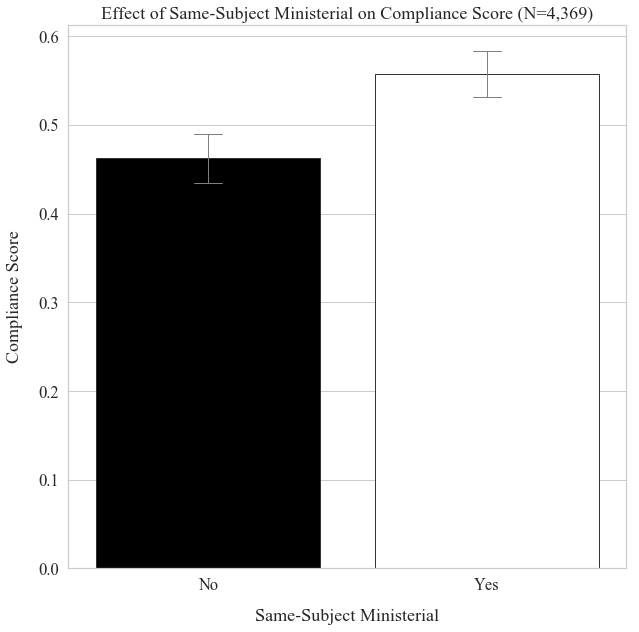

In [21]:
# Bar plot of 'Compliance Score' by 'Same-Subject Ministerial Meeting'
df['Same-Subject Ministerial'] = np.where(df['Number of Ministerials'] > 0, 'Yes', 'No')
data = df[['Compliance Score', 'Same-Subject Ministerial']]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.set(font='Times New Roman', style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))

plt.xlabel('Same-Subject Ministerial Meeting', labelpad=15, **csfont)
plt.ylabel('Compliance Score', labelpad=15, **csfont)
plt.title('Effect of Same-Subject Ministerial on Compliance Score (N=4,369)', **csfont)

colour = ['black', 'white']
plot = sns.barplot(x='Same-Subject Ministerial', y='Compliance Score', data=data, palette=colour,
                   linewidth=1, edgecolor='0.2', errwidth= 1, capsize=0.1, errcolor='gray')
#plt.savefig('Title.png', bbox_inches='tight')

In [22]:
# Isolate variables of interest and give analysis-friendly names
columns = ['Number of Same-Issue Commitments', 'GDP per Capita', 'GDP per Capita Growth',
           'Closest Ministerial', 'Year', 'GDP', 'Total Number of Commitments', 'Binding Level',
           'Mentions Specific Date', 'Mentions UN', 'Mentions Developing Countries',
           'Country_Italy', 'Issue-Area_Trade', 'Compliance Score']
renamed = ['num_same_issue_commitments', 'gdp_pcap', 'gdp_pcap_growth', 'closest_min',
           'year', 'gdp', 'num_commitments', 'binding_level', 'mentions_date', 'mentions_un',
           'mentions_developing', 'is_italy', 'is_trade_commitment', 'compliance_score']
data = df_model[columns]
data.columns = renamed

# Create column for having same-subject ministerial
data['had_min'] = np.where(data['closest_min'] != 365, 1, 0)
data = data.drop(['closest_min'], axis=1)

# Turn GDP into billions
data['gdp'] = data['gdp'] / 1000000000

 # Preprare model
dependent = 'compliance_score'
independent = list(data.drop('compliance_score', axis=1).columns)
coefficients = ' + '.join([str(elem) for elem in independent])
formula = dependent + ' ~ ' + coefficients

# Print results
results = smf.ols(formula, data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       compliance_score   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     24.19
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           3.40e-57
Time:                        20:20:19   Log-Likelihood:                -4250.9
No. Observations:                4369   AIC:                             8530.
Df Residuals:                    4355   BIC:                             8619.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [23]:
# We use this output for the report
# Note that compliance assesments are made on a scale of -1 to 1
# So effects are divided by 2 and multipled by 100 to get effect on compliance as percents
# Quadratic maximum is found using midpoint method (-b/2a)

# Isolate variables of interest and give analysis-friendly names
columns = ['Number of Same-Issue Commitments', 'GDP per Capita', 'GDP per Capita Growth',
           'Closest Ministerial', 'Year', 'GDP', 'Total Number of Commitments', 'Binding Level',
           'Mentions Specific Date', 'Mentions UN', 'Mentions Developing Countries',
           'Country_Italy', 'Issue-Area_Trade', 'Compliance Score']
renamed = ['num_same_issue_commitments', 'gdp_pcap', 'gdp_pcap_growth', 'closest_min',
           'year', 'gdp', 'num_commitments', 'binding_level', 'mentions_date', 'mentions_un',
           'mentions_developing', 'is_italy', 'is_trade_commitment', 'compliance_score']
data = df_model[columns]
data.columns = renamed

# Create new variable for ministerial time
data['min_time'] = ''
data['min_time'] = np.where(data['closest_min'] < 0, 'before', df['Ministerial Time'])
data['min_time'] = np.where(data['closest_min'] > 0, 'after', df['Ministerial Time'])
data['min_time'] = np.where(data['closest_min'] == 365, 'none', df['Ministerial Time'])

# Transform into dummies
data = data.join(pd.get_dummies(data['min_time'], prefix='min')).drop('min_time', axis=1)
data = data.drop(['min_none', 'closest_min'], axis=1)

# Turn GDP into trillions
data['gdp'] = data['gdp'] / 1000000000000

# Turn per capita GDP into thousands
data['gdp_pcap'] = data['gdp_pcap'] / 1000

# Add quadratic variables based on results from bivariate analysis
quadratics = ['num_commitments']
for i in quadratics:
    data[i + '_2'] = data[i] ** 2

 # Prepare model
dependent = 'compliance_score'
independent = list(data.drop('compliance_score', axis=1).columns)
coefficients = ' + '.join([str(elem) for elem in independent])
formula = dependent + ' ~ ' + coefficients

# Print results
results = smf.ols(formula, data=data).fit()
print(results.summary())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:       compliance_score   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     22.09
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           4.26e-59
Time:                        20:20:19   Log-Likelihood:                -4243.0
No. Observations:                4369   AIC:                             8518.
Df Residuals:                    4353   BIC:                             8620.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Appendix

(0, 15)

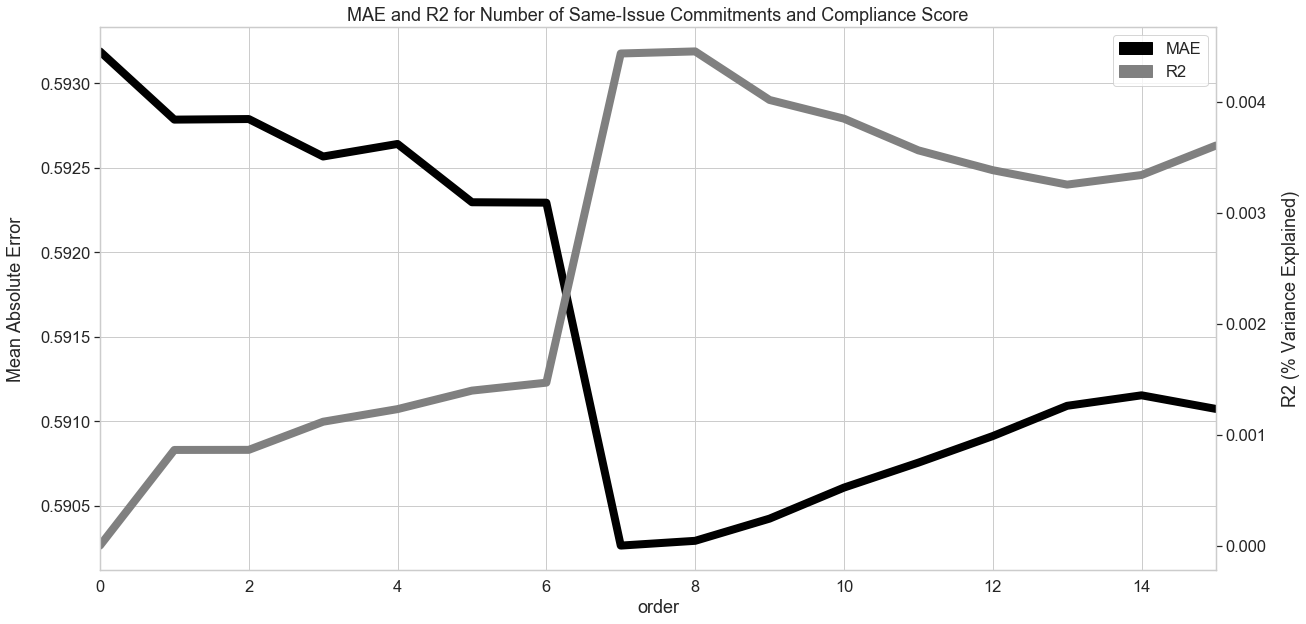

In [24]:
# Use this to check optimal polynomial order
variable = 'Number of Same-Issue Commitments'

data = df[['Compliance Score', variable]]
X = data[variable][:, np.newaxis]
y = data['Compliance Score'][:, np.newaxis]

mae = []
r2 = []

for i in range(0,16):
    polynomial_features = PolynomialFeatures(degree=i)
    
    x_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    mae.append(mean_absolute_error(y,y_poly_pred))
    r2.append(r2_score(y,y_poly_pred))

orders = pd.DataFrame({'mae': mae, 'r2': r2}).reset_index().rename(columns={'index': 'order'})

sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, rc={"lines.linewidth": 8}, style='whitegrid')

ax1 = sns.lineplot(x=orders['order'], y=orders['mae'], color='black')
ax2 = sns.lineplot(x=orders['order'], y=orders['r2'], ax=ax1.twinx(), color='gray')
plt.title('MAE and R2 for ' + variable + ' and Compliance Score')
ax1.set_ylabel('Mean Absolute Error', labelpad=15)
ax2.set_ylabel('R2 (% Variance Explained)', labelpad=15)
ax2.grid(False)

mae_l = mpatches.Patch(color='black', label='MAE')
r2_l = mpatches.Patch(color='gray', label='R2')
plt.legend(handles=[mae_l, r2_l])
plt.xlim(0,15)